<img src="images/1/titulos/0-VisaoGeral.png">

## Assuntos tratados neste notebook:
- O que é Regressão Linear Simples
- Como calcular Regressão Linear Simples usando scikit-learn, numpy ou 'manualmente'
- O que é uma matriz
- O que é e como calcular a matriz inversa, transposta e a multiplicação entre matrizes
- Como avaliar o desempenho do seu modelo com MAE (Mean absolute error) e RSME (Root Mean Square Error)
- Diferenças entre MAE e RSME

<img src="images/1/titulos/1-OProblema.png">

O quanto as notícias negativas na mídia digital influenciam as vendas de uma ação na bolsa de valores?
Neste notebook iremos utilizar Regressão Linear Simples para relacionar as notícias compartilhadas no meio online com a quantidade total de pessoas que venderam a ação.<br><br>
(<i>IMPORTANTE: esse dataset não é real e foi criado pelo autor só para exemplificar a utilização de Regressão Linear Simples.</i>)

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# configurando matplotlib
parameters = {
        'legend.fontsize': 'large',
        'figure.figsize': (14,9),
        'axes.labelsize': 20,
        'axes.titlesize': 22,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        # 'axes.titlepad': 20
        }
plt.rcParams.update(parameters)

#configurando seaborn
sns.set_style("dark", {'axes.grid' : True})

<img src="images/1/titulos/2-CarregandoEVisua.png">

In [2]:
#carregando dados na planilha
df_vendas = pd.read_csv("dataset/Noticia-vendasAcoes.csv", usecols=['Vendas_Acao','Noticias_ON'])

#visualizando dataset
df_vendas.head()

,Vendas_Acao,Noticias_ON
0,500,3
1,1200,5
2,2000,9
3,3200,11
4,3700,15


Text(0.5, 0, 'Notícias online')

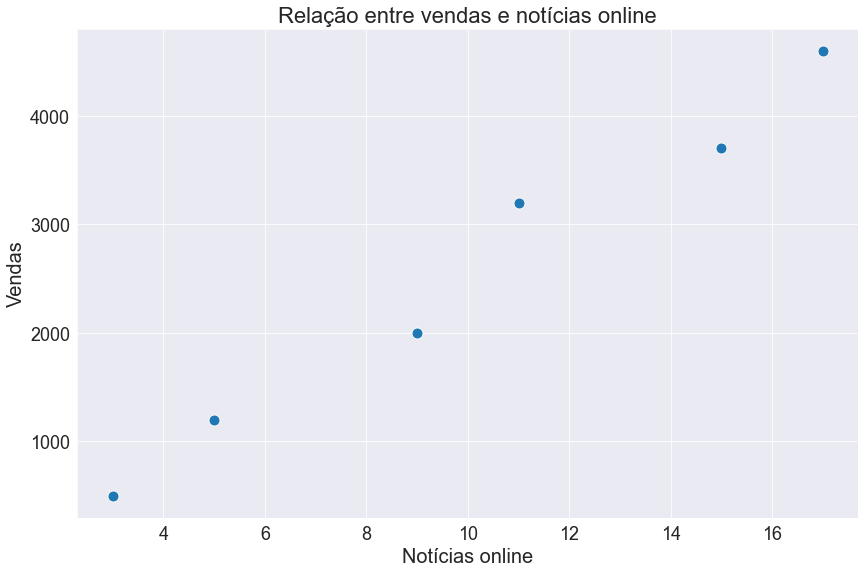

In [3]:
#visualizando relação entre Vendas e Notícias online
g = sns.scatterplot(data=df_vendas, x="Noticias_ON",y="Vendas_Acao",s=120)
g.axes.set_title("Relação entre vendas e notícias online",fontsize=22)
g.set_ylabel("Vendas")
g.set_xlabel("Notícias online")

<img src="images/1/titulos/3-RegressaoLinearS.png">

# $Y = \beta_0 + \beta_1 X$

<i>onde:</i><br>
Y: variável dependente ou variável a ser calculada (Em nosso exemplo, será o total de pessoas que **venderam a ação** no mês<br>
X: variável independente, usada para prever Y (Em nosso exemplo, será o total de **notícias publicadas pela mídia de forma online** por mês)<br>
$\beta_0$: Valor onde a reta cruza o eixo Y (ou o valor de Y, quando X=0)<br>
$\beta_1$: Coeficiente angular da reta

In [4]:
#separando os dados em X e Y
X = df_vendas[['Noticias_ON']]
Y = df_vendas['Vendas_Acao']

<img src="images/1/titulos/4-AplicandoRegressaoLinear.png">

O passo a passo da utilização do scikit-learn é muito simples: <br>
1) importar a biblioteca <br>
2) declarar a variável que receberá o modelo<br>
3) chamar função "fit()" que treinará o modelo e calculará os coeficientes B0 e B1<br>
4) chamar a função "predict()" para prever valores de Y

In [5]:
#importando biblioteca
from sklearn.linear_model import LinearRegression

#declarando modelo
Lr = LinearRegression()

In [6]:
#treinando modelo
Lr.fit(X, Y)

#gerando saída do modelo
prever = Lr.predict(X)

In [7]:
#visualizando o coeficiente angular da reta 
Lr.coef_

array([282.66666667])

In [8]:
#visualizando o intercepto y
Lr.intercept_

-293.33333333333394

Text(0.5, 0, 'Notícias online')

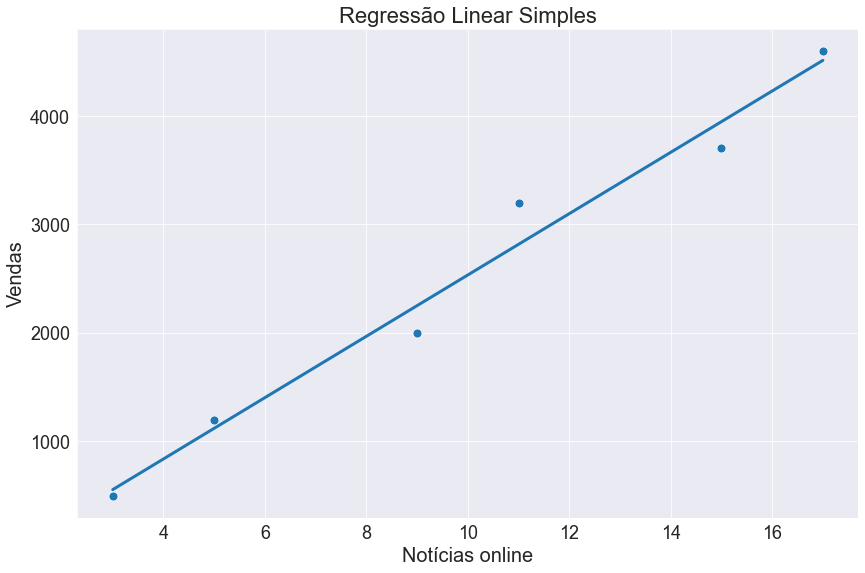

In [9]:
#Visualizando regressão
fig, ax = plt.subplots()
g = sns.scatterplot(data=df_vendas, x='Noticias_ON', y='Vendas_Acao', s=80, ax=ax)
sns.lineplot(x=df_vendas['Noticias_ON'], y=prever, ax=ax, linewidth=3)
g.axes.set_title("Regressão Linear Simples",fontsize=22)
g.set_ylabel("Vendas")
g.set_xlabel("Notícias online")

In [10]:
#comparando 5 primeiros valores de Y do modelo com o valor de Y real
print("Vendas modelo: ", prever.round(0))
print("Vendas real:   ", df_vendas['Vendas_Acao'].tolist())

Vendas modelo:  [ 555. 1120. 2251. 2816. 3947. 4512.]
Vendas real:    [500, 1200, 2000, 3200, 3700, 4600]


<h3 align="center"><i>Por que o modelo não está prevendo o valor exato?</i></h3>

Explicar o porque com a imagem de exemplo

<img src="images/1/titulos/5-RegressaoLinearRaca.png">

Fórmula geral:
# $A=(X^{T} X)^{-1} X^{T} Y$

<i>onde</i>:<br>
$A$ (array de duas posições): $\beta_0$ (intercepto Y) e $\beta_1$ (coeficiente angular)

<img src="images/1/titulos/6-Matriz.png">

In [11]:
# Desenho de uma matriz eplicando seu nome, linhas, colunas etc

"Matriz é uma tabela organizada em linhas e colunas no formato m x n, onde 'm' representa o número de linhas (horizontal) e 'n' o número de colunas (vertical).<br>
A função das matrizes é relacionar dados numéricos. Por isso, o conceito de matriz não é só importante na Matemática, mas também em outras áreas já que as matrizes têm diversas aplicações."<br>
<i>(Asth, Rafael. Matrizes.Toda Matéria. Disponível em: https://www.todamateria.com.br/matrizes-resumo/. Acesso em: 31/08/2021)</i>

<div align="center">
Matriz transposta
</div>

<div align="center">
Matriz inversa
</div>

<div align="center">
Multiplicação de matrizes
</div>

<img src="images/1/1-teoriaMatriz.png">

<h3 align="center">iremos calcular "A" por partes:</h3>

# 1) $(X^{T} X)^{-1}$
# 2) $X^{T} Y$
# 3) $(X^{T} X)^{-1} X^{T} Y$

<h3 align="center">Preparando os dados</h3>

In [12]:
#separando Y
Y = df_vendas['Vendas_Acao'].to_numpy()

#visualizando Y
Y

array([ 500, 1200, 2000, 3200, 3700, 4600], dtype=int64)

In [13]:
#salvando quantidade de linhas de X e Y
linhas = len(Y)

#criando matriz 2x2 preenchidas com números '1'
X = np.ones(shape=(linhas,2), dtype=int)

#substituindo todas linhas da segunda coluna pelas valores de "Noticias_ON"
X[:,1] = df_vendas['Noticias_ON'].to_numpy()

#visualizando matriz
print(X)

[[ 1  3]
 [ 1  5]
 [ 1  9]
 [ 1 11]
 [ 1 15]
 [ 1 17]]


In [14]:
#calculando matriz transposta de X
Xt = X.T

#visualizando Xt
print(Xt)

[[ 1  1  1  1  1  1]
 [ 3  5  9 11 15 17]]


<img src="images/1/titulos/7-CalculandoManualmente.png">

# 1) $(X^{T} X)^{-1}$

<i>multiplicando matrizes: $(X^{T} X)$</i>


<img src="images/1/3-Calculo1.png">

<img src="images/1/4-Calculo2.png">

<i>Matriz inversa: $(X^{T} X)^{-1}$</i>


<img src="images/1/5-Calculo3.png">

# 2) $X^{T} Y$

<img src="images/1/6-Calculo4.png">

# 3) $(X^{T} X)^{-1} X^{T} Y$

<img src="images/1/7-Calculo5.png">

<img src="images/1/titulos/8-CalcularUsandoNumpy.png">

$ 1)$ &nbsp; $(X^{T} X)^{-1}$

In [15]:
#produto entre matrizes
Xt_X = np.dot(Xt, X)

#visualizando produto entre matrizes
Xt_X

array([[  6,  60],
       [ 60, 750]])

In [16]:
#calculand inversa da matriz
Xt_X_inverse = np.linalg.inv(Xt_X)

#visualizando matriz inversa
Xt_X_inverse

array([[ 0.83333333, -0.06666667],
       [-0.06666667,  0.00666667]])

2) $X^{T} Y$

In [17]:
#produto entre matrizes
Xt_Y = np.dot(Xt, Y)

#visualizando produto entre matrizes
Xt_Y

array([ 15200, 194400], dtype=int64)

3) $(X^{T} X)^{-1} X^{T} Y$

In [18]:
#produto entre matrizes
A = np.dot(Xt_X_inverse, Xt_Y)

#visualizando produto entre matrizes
A

array([-293.33333333,  282.66666667])

In [19]:
#comparando valores calculados com o do modelo no sklearn
print("B0 Modelo:", Lr.intercept_, "B1 Modelo:", Lr.coef_)
print("B0 calcul:", A[0]," B1 calcul:", A[1])

B0 Modelo: -293.33333333333394 B1 Modelo: [282.66666667]
B0 calcul: -293.3333333333321  B1 calcul: 282.66666666666663


<div align="center">
Fórmula:<br>
Vendas_Acao = -293 + 283 * Noticias_ON<br><br>
Essa equação nos informa que, para cada notícia nova que é publicada, mais 283 pessoas vendem a ação.
</div>

<img src="images/1/titulos/9-CalculandoErros.png">

<h2><b>links úteis e referências:</b></h2>
<a href="https://youtu.be/Qa_FI92_qo8">Perform Linear Regression Using Matrices (vídeo)</a>
<br>
<a href="https://www.mathsisfun.com/algebra/matrix-multiplying.html">How to Multiply Matrices </a>
<br>
<a href="https://youtu.be/F10TdwBH8qc">Como calcular a matriz inversa (vídeo)</a>